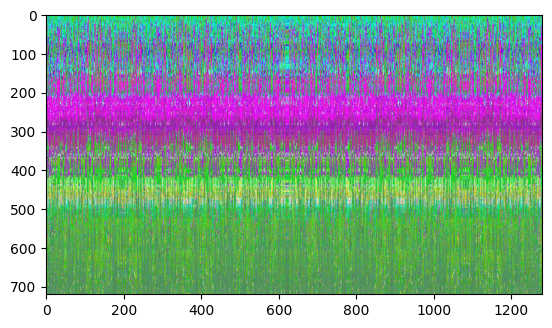

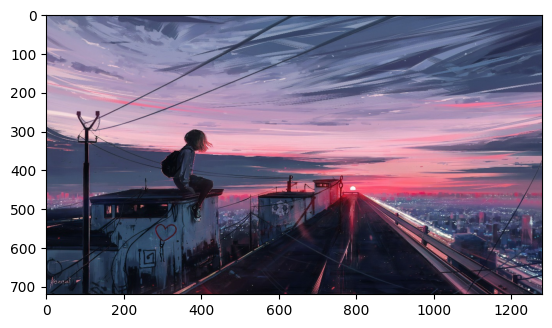

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def keygen(x, r, size):
    key = []
    for i in range(size):
        x = r * x * (1 - x)  # logistic map function
        key.append(int((x * pow(10, 16)) % 256))  # key = (x*10^16) mod256
    return key

def indexgen(x, r, size):
    index = []
    k = []
    for i in range(size):
        x = r * x * (1 - x)  # logistic map function
        k.append(x)
        index.append(i)
    for i in range(size):
        for j in range(size):
            if k[i] > k[j]:  # we will rearrange the key in ascending order
                k[i], k[j] = k[j], k[i]
                # Reordering the index along with the rearrangement of the key
                index[i], index[j] = index[j], index[i]
    return index

def encryption(img, index, key, height_of_image, width_of_image):
    # Encryption -> Substitution with XOR and then shuffling of the pixels
    encrypted_image = np.zeros_like(img)
    for i in range(height_of_image):
        for j in range(width_of_image):
            for z in range(3):  # iterate over the 3 color channels
                encrypted_image[i, j, z] = img[i, index[j], z] ^ key[z]
    return encrypted_image

def decryption(encrypted_image, index, key, height_of_image, width_of_image):
    # Decryption -> Substitution with XOR and then reshuffling of pixels
    decrypted_image = np.zeros_like(encrypted_image)
    for i in range(height_of_image):
        for j in range(width_of_image):
            for z in range(3):  # iterate over the 3 color channels
                decrypted_image[i, index[j], z] = encrypted_image[i, j, z] ^ key[z]
    return decrypted_image

if __name__ == '__main__':
    img = mpimg.imread("trial.bmp")

    # Generating the Chaotic Key
    height_of_image = img.shape[0]
    width_of_image = img.shape[1]
    key = keygen(0.000001, 3.14, height_of_image * width_of_image)
    index = indexgen(0.1, 3.69, width_of_image)

    # Encryption
    encrypted_image = encryption(img, index, key, height_of_image, width_of_image)
    plt.imshow(encrypted_image)
    plt.show()

    # Decryption
    decrypted_image = decryption(encrypted_image, index, key, height_of_image, width_of_image)
    plt.imshow(decrypted_image)
    plt.show()
